## Esercizio 03

Lo scopo è stimare il prezzo corretto per le opzioni Call e Put in un modello "plain vanilla". L'evoluzione del prezzo è segue un random walk geometrico, che pertanto dobbiamo simulare. Procederemo in due modi:
- campionando il RW geometrico "direttamente"
- campionando il RW geometrico "step by step"

I parametri assegnati sono:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

Confronteremo i risultati simulati con la soluzione analitica

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
from scipy import log, exp, sqrt
from IPython.display import set_matplotlib_formats


def data_blocking(data, block_size):
    if block_size <=0:
        print("block_ave cannot run, please assign a positive number of blocks")
        return 0
    
    blocks = int(data.size/block_size)
    error = np.zeros(blocks)
    cumul_ave = np.zeros(blocks)
    block_ave = 0
    m_sum = 0
    m_sum2 = 0
    
    for i in range(blocks):
        block_sum = 0
        for j in range(block_size):
            block_sum += data[j+i*block_size]
        block_ave  = block_sum/block_size 
        m_sum += block_ave
        m_sum2 += block_ave**2
        cumul_ave[i] = m_sum/(i+1)
        if i==0:
            error[i]=0
        else:
            error[i] = math.sqrt( (m_sum2/(i+1) - (m_sum/(i+1))**2)/i )
    return cumul_ave, error

In [2]:
from scipy.special import erf

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)

DIR MODE
Call = 14.99 +- 0.06
Put = 5.42 +- 0.03

WALK MODE
Call = 14.99 +- 0.06
Put = 5.44 +- 0.03

EXPECTED
Call =  14.98
Put =  5.46



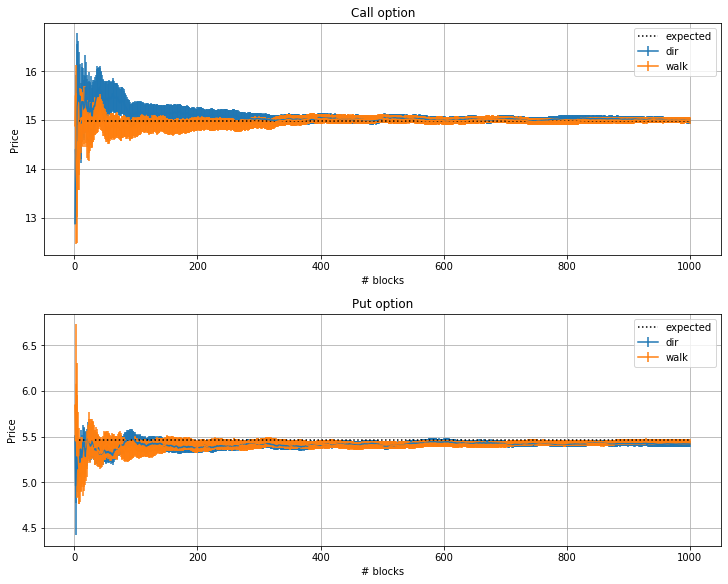

In [3]:
block_size = 100

fig, axs = plt.subplots(2,1, constrained_layout=True, figsize=(10,8))
modes= ['dir', 'walk']
for mode in modes:
    data = np.loadtxt('price_' + mode + '.dat')
    C = exp(-r*T)*np.maximum(0,data-K)
    C_prog, C_err = data_blocking(C, block_size)
    n_blocks = len(C)/block_size
    axs[0].errorbar(np.arange(1, n_blocks+1), C_prog, C_err, label=mode )
    axs[0].set_title('Call option')
    
    P = exp(-r*T)*np.maximum(0,K-data)
    P_prog, P_err = data_blocking(P, block_size)
    n_blocks = len(P)/block_size
    axs[1].errorbar(np.arange(1, n_blocks+1), P_prog, P_err, label=mode )
    axs[1].set_title('Put option')

    
    print(mode.upper() + ' MODE')
    print('Call = {0} +- {1}'.format("{:.2f}".format(C_prog[-1]), "{:.2f}".format(C_err[-1])))
    print('Put = {0} +- {1}'.format("{:.2f}".format(P_prog[-1]), "{:.2f}".format(P_err[-1])))
    print()

axs[0].hlines(call, 1, n_blocks+1, linestyles='dotted', label = 'expected')
axs[1].hlines(put, 1, n_blocks+1, linestyles='dotted', label = 'expected')


for ax in axs:
    ax.grid()
    ax.legend()
    ax.set_xlabel('# blocks')
    ax.set_ylabel('Price')

print('EXPECTED')
print('Call = ', "{:.2f}".format(call))
print('Put = ', "{:.2f}".format(put))
print()
plt.show()